In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import plot,savefig
from sklearn.metrics import roc_curve, auc
from matplotlib.pyplot import plot,savefig
import xgboost
from xgboost import XGBClassifier as XGB 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import sqrt
from sklearn import metrics
import seaborn as sns
import pickle

In [9]:
clf = XGB()

In [10]:
efm1train = pd.read_csv('training_efm1.csv')
efm1test = pd.read_csv('test_efm1.csv')
efm1x = efm1train.iloc[:,1:]
efm1y = efm1train.iloc[:,0]
efm1x_test = efm1test.iloc[:,1:]
efm1y_test = efm1test.iloc[:,0]

efm2train = pd.read_csv('training_efm2.csv')
efm2test = pd.read_csv('test_efm2.csv')
efm2x = efm2train.iloc[:,1:]
efm2y = efm2train.iloc[:,0]
efm2x_test = efm2test.iloc[:,1:]
efm2y_test = efm2test.iloc[:,0]

efm3train = pd.read_csv('training_efm3.csv')
efm3test = pd.read_csv('test_efm3.csv')
efm3x = efm3train.iloc[:,1:]
efm3y = efm3train.iloc[:,0]
efm3x_test = efm3test.iloc[:,1:]
efm3y_test = efm3test.iloc[:,0]

efm4train = pd.read_csv('training_efm4.csv')
efm4test = pd.read_csv('test_efm4.csv')
efm4x = efm4train.iloc[:,1:]
efm4y = efm4train.iloc[:,0]
efm4x_test = efm4test.iloc[:,1:]
efm4y_test = efm4test.iloc[:,0]

efm1_mrmrfea = pd.read_csv('efm1_mrmr.csv')
efm2_mrmrfea = pd.read_csv('efm2_mrmr.csv')
efm3_mrmrfea = pd.read_csv('efm3_mrmr.csv')
efm4_mrmrfea = pd.read_csv('efm4_mrmr.csv')

efm1_select = []
for i in range(efm1_mrmrfea.shape[0]):
    a = str(efm1_mrmrfea.iloc[i,1])
    efm1_select.append(a)
    
efm1_X = efm1x[efm1_select]

efm2_select = []
for i in range(efm2_mrmrfea.shape[0]):
    a = str(efm2_mrmrfea.iloc[i,1])
    efm2_select.append(a)
    
efm2_X = efm2x[efm2_select]

efm3_select = []
for i in range(efm3_mrmrfea.shape[0]):
    a = str(efm3_mrmrfea.iloc[i,1])
    efm3_select.append(a)
    
efm3_X = efm3x[efm3_select]

efm4_select = []
for i in range(efm4_mrmrfea.shape[0]):
    a = str(efm4_mrmrfea.iloc[i,1])
    efm4_select.append(a)
    
efm4_X = efm4x[efm4_select]

In [14]:
#确定最佳阈值
def Find_Optimal_Cutoff(TPR, FPR, threshold):
    y = TPR - FPR
    Youden_index = np.argmax(y)  # Only the first occurrence is returned.
    optimal_threshold = threshold[Youden_index]
    point = [FPR[Youden_index], TPR[Youden_index]]
    return optimal_threshold, point

In [12]:
def calculate_data(TP,FP,FN,TN):
    numerator = (TP * TN) - (FP * FN) #马修斯相关系数公式分子部分
    denominator = sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) #马修斯相关系数公式分母部分
    MCCresult = numerator/denominator
    return MCCresult

In [13]:
def ROC(label, y_prob):

    fpr, tpr, thresholds = roc_curve(label, y_prob)
    roc_auc = auc(fpr, tpr)

    optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds)
    return fpr, tpr, roc_auc, optimal_th, optimal_point

/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:31:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:31:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

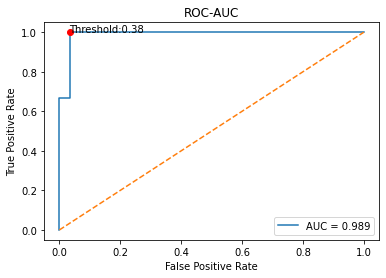

1.0 0.9666666666666667 0.9833333333333333 0.967741935483871 0.9836065573770492


0.9672041516493516

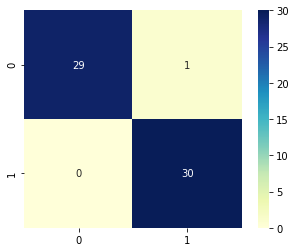

In [15]:
#ECFP44+TOP3融合特征的sn,sp,acc,MCC和ROC曲线
XGB_efm1x_train = efm1_X.iloc[:,:1074]
XGB_efm1y_train = efm1y
XGB_efm1x_test = efm1test[efm1_select].iloc[:,:1074]
XGB_efm1y_test = efm1test.iloc[:,0]


XGB_efm2x_train = efm2_X.iloc[:,:32]
XGB_efm2y_train = efm2y
XGB_efm2x_test = efm2test[efm2_select].iloc[:,:32]
XGB_efm2y_test = efm2test.iloc[:,0]


XGB_efm3x_train = efm3_X.iloc[:,:1314]
XGB_efm3y_train = efm3y
XGB_efm3x_test = efm3test[efm3_select].iloc[:,:1314]
XGB_efm3y_test = efm3test.iloc[:,0]


XGB_efm4x_train = efm4_X.iloc[:,:2050]
XGB_efm4y_train = efm4y
XGB_efm4x_test = efm4test[efm4_select].iloc[:,:2050]
XGB_efm4y_test = efm4test.iloc[:,0]


XGB_efm1y_score = clf.fit(XGB_efm1x_train,XGB_efm1y_train).predict_proba(XGB_efm1x_test)
XGB_efm2y_score = clf.fit(XGB_efm2x_train,XGB_efm2y_train).predict_proba(XGB_efm2x_test)
XGB_efm3y_score = clf.fit(XGB_efm3x_train,XGB_efm3y_train).predict_proba(XGB_efm3x_test)
XGB_efm4y_score = clf.fit(XGB_efm4x_train,XGB_efm4y_train).predict_proba(XGB_efm4x_test)
XGB_predictp = (XGB_efm1y_score+XGB_efm2y_score+XGB_efm3y_score+XGB_efm4y_score)/4

#得到XGB预测的标签
XGB_efm1y_predict = clf.fit(XGB_efm1x_train,XGB_efm1y_train).predict(XGB_efm1x_test)
XGB_efm2y_predict = clf.fit(XGB_efm2x_train,XGB_efm2y_train).predict(XGB_efm2x_test)
XGB_efm3y_predict = clf.fit(XGB_efm3x_train,XGB_efm3y_train).predict(XGB_efm3x_test)
XGB_efm4y_predict = clf.fit(XGB_efm4x_train,XGB_efm4y_train).predict(XGB_efm4x_test)
XGB_predict = np.array((XGB_efm1y_predict+XGB_efm2y_predict+XGB_efm3y_predict+XGB_efm4y_predict)>2,dtype=int)


fpr, tpr, roc_auc, optimal_th, optimal_point = ROC(XGB_efm4y_test,XGB_predictp[:,1])
 
plt.figure(1)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')
plt.title("ROC-AUC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


#得到混淆矩阵
XGB_best = pd.DataFrame(XGB_predictp[:,1]>0.38).astype(int)
XGB_bestpre = metrics.confusion_matrix(XGB_efm4y_test,XGB_best)
sns.heatmap(XGB_bestpre,annot=True,fmt='.20g', xticklabels= True, yticklabels= True, square=True,cmap="YlGnBu")#,fontproperties=prop)
TN, FP, FN, TP = confusion_matrix(XGB_efm4y_test, XGB_best).ravel()
sn = TP/(TP+FN)
sp = TN/(TN+FP)
acc = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
F1_score = 2*(precision*sn)/(precision+sn)

print(sn,sp,acc,precision,F1_score)
calculate_data(TP,FP,FN,TN)

In [19]:
XGB1 = clf.fit(XGB_efm1x_train,XGB_efm1y_train)
pickle.dump(XGB1,open('XGB1.dat','wb'))

[22:37:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [21]:
XGB2 = clf.fit(XGB_efm2x_train,XGB_efm2y_train)
pickle.dump(XGB2,open('XGB2.dat','wb'))

[22:41:07] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/anaconda/opt/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [22]:
XGB3 = clf.fit(XGB_efm3x_train,XGB_efm3y_train)
pickle.dump(XGB3,open('XGB3.dat','wb'))

[22:41:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [23]:
XGB4 = clf.fit(XGB_efm4x_train,XGB_efm4y_train)
pickle.dump(XGB3,open('XGB4.dat','wb'))

[22:41:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
